# Домашнее задание 2 (20 + 40 = 60 pts )

## Задача 1 (20 pts)

- (5 pts) Докажите, что $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$, если $\mathrm{vec}(X)$ векторизация матрицы по столбцам. Что и почему изменится, если использовать векторизацию по строкам? 

- (2 pts) Какова сложность наивного вычислени $(A \otimes B) x$ и почему она такова? Покажите, как она может быть снижена.

- (3 pts) Пусть матрицы $A$ и $B$ имеют спектральные разложения $A = S_A\Lambda_A S_A^{-1}$ и $B = S_B\Lambda_B S^{-1}_B$. Найдите собственные векторы и собственные значения у матрицы $A\otimes I + I \otimes B$.

- (10 pts) Пусть $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Оцените аналитически число итераций необходимых для решения линейной системы с матрицей $A$ с относительной точностью $10^{-4}$ используя
    - метод Ричардсона с оптимальным параметром (используйте евклидову норму)
    - метод Чебышёва (используйте евклидову норму)
    - метод сопряжённых градиентов (используйте $A$-норму).

# № 1

A - матрица $n \times m$, X - матрица $m \times l$, B - матрица $l \times s$  $$ u = \mathrm{vec}(AXB) $$ тогда $$ u_{(j - 1)n + i} = \sum_{f = 1}^{m} a_{i f} \sum_{k = 1}^{l} x_{f k}b_{k j} $$ действительно ведь $\sum_{k = 1}^{l} x_{f k}b_{k j}$ f-ая строка j-го столбца матрицы XB, тогда $\sum_{f = 1}^{m} a_{i f} \sum_{k = 1}^{l} x_{f k}b_{k j} $ действительно $i,j$ -ый элемент AXB - матрицы $n \times s$. $$ $$ Теперь посмотрим на  $u^{'} = (B^\top \otimes A) \mathrm{vec}(X)$:
$$
(B^\top \otimes A) = 
\begin{bmatrix}
b_{11}A & \dots & b_{l1}A \\
\vdots & \ddots & \vdots \\
b_{1s}A & \dots & b_{ls}A
\end{bmatrix}
$$
Тогда:
$$u^{'}_{(j - 1)n + i} =  \sum_{k = 1}^{l} b_{k j} \sum_{f = 1}^{m} a_{i f} x_{f k}$$ действительно, $\sum_{f = 1}^{m} a_{i f} x_{f k}$ скалярное произведение i-ой строки матрицы A на k-ый столбец X. Тогда $\sum_{k = 1}^{l} b_{k j} \sum_{f = 1}^{m} a_{i f} x_{f k}$ - скалярное произведение (j - 1)n + i строки матрицы $ B^\top \otimes A $ на $ \mathrm{vec}(X)$ $$ $$
Поменяем местами суммирование:
$$u^{'}_{(j - 1)n + i} =  \sum_{k = 1}^{l} b_{k j} \sum_{f = 1}^{m} a_{i f} x_{f k} =  \sum_{k = 1}^{l} \sum_{f = 1}^{m}   b_{k j} a_{i f} x_{f k} = \sum_{f = 1}^{m} a_{i f} \sum_{k = 1}^{l} x_{f k}b_{k j} =  u_{(j - 1)n + i}$$ Что и требовалось доказать.

Если рассматривать векторизацию по строке, тогда:
$$u = \mathrm{vec}(AXB)$$ $$  u_{(i - 1)n + j} = \sum_{f = 1}^{m} a_{i f} \sum_{k = 1}^{l} x_{f k}b_{k j} $$                                                         $ \sum_{k = 1}^{l} x_{f k}b_{k j} $ - скалярное произведение j-го столбца B (или j-ой строки матрицы $B^\top$) и f-ой строки X, тогда $\sum_{f = 1}^{m} a_{i f} \sum_{k = 1}^{l} x_{f k}b_{k j}$ - скалярное произведение (i - 1)n + j ой строки матрицы $ A \otimes B^\top $ на $\mathrm{vec}(X)$ по строке. 

# № 2

Наивное решение - посчитать матрицу  $ A \otimes B $ и умножить на вектор. $A$ размерности $n \times m$, $B$ размерности $l \times s$, тогда вычисление $ A \otimes B $ - nmls операций (умножить матрицу $l \times s$ на $nm$ чисел), затем умножить вектор на матрицу размерности $nl \times ms$ на вектор за nmls множений - получается $O(nmls)$. Теперь заметим что можно свести задачу к предыдущей, если вектор x предсавить матрицей X размера $s \times m$, векторизация которой - x. Тогда задача - последовательно умножить три матрицы - $B X A^\top$ и векторизвать по столбцам полученную матрицу, что можно выполнить за $slm$ (умножение B на X) +  $lnm$ (умножение BX на $A^\top$) т.е за $ lm(s + n)$ операций и может быть ускорено ещё с помощью алгоритма Штрассена.

# № 3

# № 4

Нужно оценить $\frac{||r_k||_2}{||r_0||_2}$, где r_k - невязка на k-ом шаге. Из лекций оценка для Ричардсона с оптимальным шагом: $||r_k||_2 \leq q^k ||r_0|| $, где $ q = \frac{cond(A) - 1}{cond(A) + 1}$ т.к. матрица диагональна легко определить её собственные значения $\lambda_{min} = 10^{-3}, \lambda_{max} = 10^3$, тогда $cond(A) = \frac{\lambda_{max}}{\lambda_{min}}= 10^6$, тогда нужная точность  - $ eps \approx q^k$, значит $k \approx log_q(eps) \approx 4605171$ итераций.

In [10]:
import math
print("Количество итераций Ричардсон:", math.log(1e-4, (1e6 - 1) / (1e6 + 1)))

Количество итераций Ричардсон: 4605170.1860125


Оценка для метода Чебышёва: $||r_k||_2 \leq q^k ||r_0|| $, где $ q = \frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1}$, значит $k \approx log_q(eps) \approx 4606$ итераций.

In [11]:
print("Количество итераций Чебышёв:", math.log(1e-4, (1e3 - 1) / (1e3 + 1)))

Количество итераций Чебышёв: 4605.168650930853


Т.к. у нас имеется очевидный выброс - с.з. 1000, то метод сопряженных градиентов после первой итерации должен сходится так, будто этого выброса не было, т.к. после 1ой итерации полином из оценки сходимости будет второй степени и таким образом занулит выброс. Тогда эффективное число обусловленности матрицы A с которым будет сходится метод после одной итерации:
$cond_{effect}(A) = \frac{\lambda_{max \in [0.001, 1]}}{\lambda_{min \in [0.001, 1]}} = \frac{1}{10^{-3}} = 10^3 $, на этом отрезке собственные значения расположены равномерно, значит метод сходится так же как метод Чебышёва, значит $k \approx log_q(eps) + 1 \approx 147$ итераций.

In [14]:
print("Количество итераций CG:", math.log(1e-4, (math.sqrt(1e3) - 1) / (math.sqrt(1e3) + 1)) + 1) 

Количество итераций CG: 146.57971229671443


## Задача 2 (40 pts)

### Спектральное разбиение графа и обратная итерация


Дан связный граф $G$ и соответствующий ему лапласиан $L = D - A$ с собственными значениями  $0=\lambda_1, \lambda_2, ..., \lambda_n$, где $D$ диагональная матрица со степенями вершин на диагонали, а $A$ – матрица смежности.
Вектор Фидлера – это собственный вектор, соответствующий собственному значению $\lambda_2$ матрицы $L$. Этот вектор может быть использован для разбиения графа: положительные значения соответствуют одной части графа, отрицательные – другой.

### Метод обратной итерации (15 pts)

Для поиска вектора Фидлера мы будем использовать метод Релея.

* (5 pts) Выпишите матрицу ортопроектора на подпространство ортогональное собственному вектору матрице $L$, соответствующему собственному значению $0$ и докажите (аналитически), что это действительно ортопроектор.
 
* (5 pts) Реализуйте функцию спектрального разделения графа ```partition```:

# № 1

Собственному значению 0 соответсвует вектор из единиц, т.к. сумма элементов по строке равна 0 (кратность вершины в точности равна количеству выходящих ребер). Вектора из ортогонального дополнения к вектору из единиц можно найти из уравнения $(x, (1, \dots, 1)) = x_1 + \dots + x_n = 0$, его решение можно записать, напрмер так: u = $\begin{bmatrix}
-x_2 - x_3 - \dots - x_n  \\
x_2  \\
\vdots  \\
x_3  \\
x_n 
\end{bmatrix} $. Матрица P, переводящая вектор x в u: $$
P = 
\begin{bmatrix}
0 & -1 & \dots & -1 & -1 \\
0 & 1 & \dots & 0 & 0 \\
\vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 & \dots & 1 & 0 \\
0 & 0 & \dots & 0 & 1
\end{bmatrix}
$$ Тогда $ P^2 = P $, значит $P$ - ортопроектор на ортогональное дополнение к вектору из единиц.

# № 2

In [250]:
import scipy.sparse as spsp
import scipy.sparse.linalg 
import numpy as np
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (float)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    diag = np.array(A.sum(axis=1)).ravel()
    L = spsp.diags(diag, 0) - A
    L_solve = spsp.linalg.splu((L - spsp.diags(np.ones(L.shape[0]) * shift, 0)).tocsc())
    row_1 = np.zeros(A.shape[0] - 1, dtype=int)
    row_2 = np.arange(1, A.shape[0], dtype=int)
    column = np.arange(1, A.shape[0])
    P = spsp.csr_matrix(
        (np.hstack(
            (np.ones(A.shape[0] - 1) * -1, 
             np.ones(A.shape[0] - 1))
        ), (np.hstack((row_1, row_2)), 
            np.hstack((column, column))
           )
        )
    )
    x_pred = np.copy(x0)
    x_pred = P.dot(x_pred)
    x_pred /= np.linalg.norm(x_pred)
    eigs = []
    eigs.append(L.dot(x_pred) @ x_pred + shift)
    for i in range(num_iter_fix):
        x_next = L_solve.solve(x_pred)
        x_next = P.dot(x_next)
        x_next /= np.linalg.norm(x_next)
        x_next *= np.sign(x_next[0])
        eigs.append(L.dot(x_next) @ x_next)
        cur_eps = np.linalg.norm(L.dot(x_next) - x_next * eigs[-1])
        x_pred = x_next
        if  cur_eps <= eps:
            return x_next, np.array(eigs), cur_eps
    for i in range(num_iter_adapt):
        tau = L.dot(x_pred) @ x_pred
        x_next = spsp.linalg.spsolve(L - spsp.diags(np.ones(L.shape[0]) * tau, 0), x_pred)
        x_next = P.dot(x_next)
        x_next /= np.linalg.norm(x_next)
        x_next *= np.sign(x_next[0])
        eigs.append(L.dot(x_next) @ x_next)
        cur_eps = np.linalg.norm(L.dot(x_next) - x_next * eigs[-1])
        x_pred = x_next
        if  cur_eps <= eps:
            return x_next, np.array(eigs), cur_eps
    return x_next, eigs, cur_eps

Алгоритм должен останавливаться спустя `num_iter_fix + num_iter_adapt` итераций или если выполнено следующее соотношение

$$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ на некотором шаге } k.$$

Не забудьте использовать ортогональную проекцию из задачи выше в итерационном процессе, чтобы получить верный собственный вектор.
Также хорошей идеей могло быть использование ```shift=0``` до запуска адаптивного режима. Однако это невозможно в силу вырождннности матрицы $L$, а разреженное разложенное в ```scipy``` не работет в этом случае. Поэтому вместо нулевого сдвига предлагается использовать некоторое малое значение.

* (3 pts) Сгенерируйте случайный `lollipop_graph`, используя библиотеку `networkx`, и найдите его разбиение. [Нарисуйте](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) этот граф с вершинами окрашенными в соответствии с разбиением.

* (2 pts) Запустите метод со случайного начального приближение ```x0```, установите ```num_iter_fix=0``` и объясните, почему метод может сойтись к неверному собственному значению?

# № 3

In [263]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [272]:
G = nx.lollipop_graph(np.random.randint(2, 20), np.random.randint(2, 20))

In [273]:
A = nx.adjacency_matrix(G)

In [274]:
v_fidler, eigs, eps = partition(A, 0.001, 2, 3, np.random.rand(A.shape[0]), 1e-6)

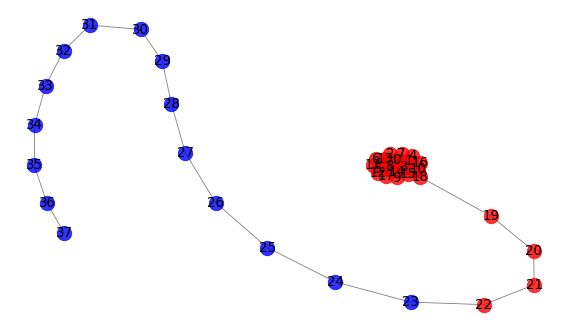

In [275]:
lable = {}
for i in G.nodes:
    lable[i] = i
plt.figure(figsize=(12,7), dpi=60)
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=np.array(G.nodes)[v_fidler > 0],
                       node_color='r',
                       node_size=300,
                       alpha=0.8)

nx.draw_networkx_nodes(G,pos,
                       nodelist=np.array(G.nodes)[v_fidler < 0],
                       node_color='b',
                       node_size=300,
                       alpha=0.8)

nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, lable, font_size=16)

plt.axis('off')
plt.show()

# № 4

In [276]:
v_fidler, eigs, eps = partition(A, 0.001, 0, 10, np.random.rand(A.shape[0]), 1e-6)

In [277]:
eigs[-1]

18.999999999999996

Т.к. начальное приближение - случайное, начальная оценка на собственное значение может значительно отличаться от того собственного значения, которое мы ищем, а это значит что после сдвига минимальное по модулю собсвенное значение - то на которое мы получили оценку, а оно и будет искаться в методе обратной итерации.

### Спектральные свойства графа (15 pts)

* (5 pts) Докажите, что кратность собственного значения $0$ в спектре лапласиана графа равна числу связных компонент.
* (10 pts) Второе наименьшее собственное значение $L(G)$, $\lambda_2(L(G))$, часто называется алгебраической связностью графа $G$. 
За подобным использованием этого термина стоят следующие рассуждения: граф с большей алгебраической связностью обычно имеет больше рёбер и следовательно его можно считать "более связным".  
Для проверки этого утверждения создайте несколько графов с одинаковым числом вершин. 
Одним из них должен быть простой циклический граф $C_{30}$, а другим – полный граф $K_{30}$. (Вы также можете менять число вершин в ваших эксипериментах, если это имеет смысл, но не делайте его слишком маленьким). Используйте библиотку ```networkx``` для создания графов.
    * Найдите алгебраическую связность для каждого графа, используя метод обратной итерации (с переключением на метод Релея)
    * Нарисуйте зависимость $\lambda_2(G_i)$ от $|E_i|$ – количества вершин.
    * Нарисуйте разбиение нескольких графов из множества сгенерированных
    * Прокомментируйте результаты

In [182]:
def drow_graph(G):
    A = nx.adjacency_matrix(G)
    v_fidler, eigs, eps = partition(A, 0.01, 10, 20, np.random.rand(A.shape[0]), 1e-6)
    lable = {}
    for i in G.nodes:
        lable[i] = i
    plt.figure(figsize=(12,7), dpi=60)
    pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos,
                           nodelist=np.array(G.nodes)[v_fidler > 0],
                           node_color='r',
                           node_size=300,
                           alpha=0.8)

    nx.draw_networkx_nodes(G,pos,
                           nodelist=np.array(G.nodes)[v_fidler < 0],
                           node_color='b',
                           node_size=300,
                           alpha=0.8)

    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, lable, font_size=16)

    plt.axis('off')
    plt.show()

In [173]:
C = nx.cycle_graph(30)
K = nx.complete_graph(30)
lolipops = []
for i in range(1, 29):
    lolipops.append(nx.lollipop_graph(30 - i, i))

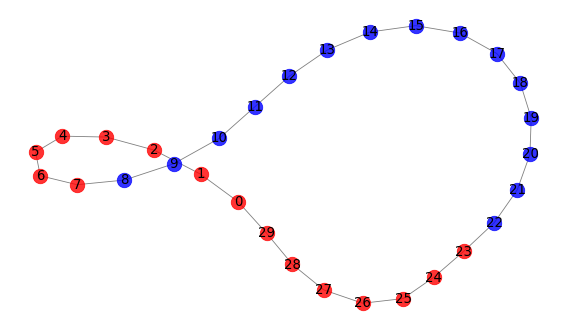

In [278]:
drow_graph(C)

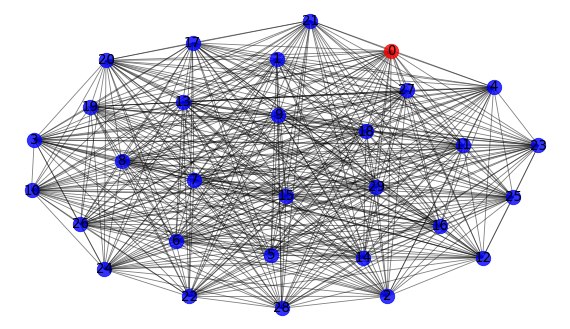

In [279]:
drow_graph(K)

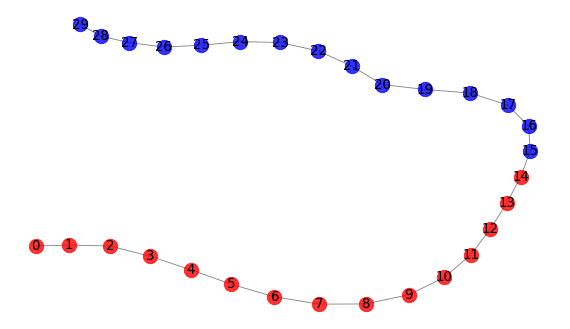

In [280]:
drow_graph(lolipops[27])

In [281]:
graphs = [C, K] + lolipops

In [282]:
v_fidler, eigs, eps = partition(A, 0.001, 10, 20, np.random.rand(A.shape[0]), 1e-12)

In [283]:
alg_connectivity = {}
alg_connectivity['eig'] = []
alg_connectivity['num_edges'] = []
for G in graphs:
    A = nx.adjacency_matrix(G)
    v_fidler, eigs, eps = partition(A, 0.01, 10, 20, np.random.rand(A.shape[0]), 1e-6)
    alg_connectivity['eig'].append(eigs[-1])
    alg_connectivity['num_edges'].append(G.number_of_edges())

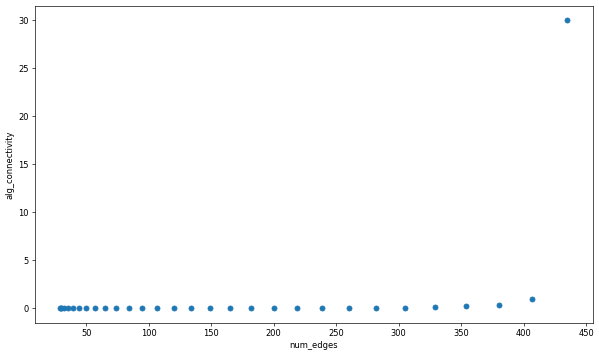

In [284]:
plt.figure(figsize=(12,7), dpi=60)
plt.scatter(alg_connectivity['num_edges'], alg_connectivity['eig'])
plt.xlabel('num_edges')
plt.ylabel('alg_connectivity')
plt.show()

Как видно из графиков ирисунков графов выше, чем больше вершин, тем больше алгебраическая связность графа, если у графа количество вершин и ребер примерно одинаково - в каждой части спектрального разбиения будет одинаковое количество вершин, если граф полный - спектральное разбиение выделит одну вершину.

### Разбиение изображения на две части (10 pts)

Рассмотрим граф, полученный из бинаризованного изображения. Вершинами графа являются только пиксели, в которых стоит $1$. Также каждая вершина имеет не более 8 соседей, то есть степень каждой вершины графа ограничена 8.
* (3 pts) Найдите изображение минимального размера $(256, 256)$ и бинаризуйте его так, чтобы граф, построенный на основе чёрных пикселей имел в точности одну связную компоненту.
* (5 pts) Напишите функцию для построения разреженной матрицы смежности из бинаризованного изображения, имея в виду вышеописанные правила
* (2 pts) Найдите разбиение итогового графа и нарисуйте изображение в соответствии с этим разбиением. Объясните результат.

In [346]:
from matplotlib.image import imread

In [407]:
img = imread('Telegram.png')

In [359]:
def binar(img, treshold):
    res = np.copy(img)
    res[res >= treshold] = 1
    res[res < treshold] = 0
    res = -res + 1
    return res

In [408]:
img = np.mean(img, axis=2)

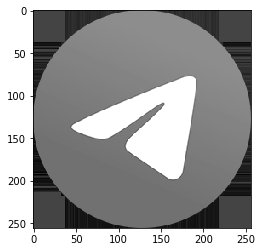

In [409]:
plt.imshow(img, cmap='gray')

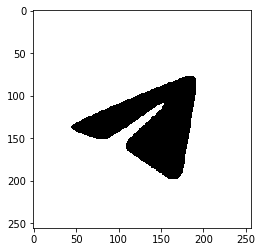

In [410]:
bimage = binar(img, 0.72)
plt.imshow(bimage, cmap='gray')

In [379]:
def schema(i, j):
    schema = [
        (i - 1, j - 1),
        (i - 1, j),
        (i - 1, j + 1),
        (i, j + 1),
        (i + 1, j + 1),
        (i + 1, j),
        (i + 1, j - 1),
        (i, j - 1)
    ]
    if i > 0 and j > 0 and i < 255 and j < 255:
        return schema
    if i == 0 and j > 0 and i < 255 and j < 255:
        return schema[3:]
    if i > 0 and j == 0 and i < 255 and j < 255:
        return schema[1:-2]
    if i > 0 and j > 0 and i == 255 and j < 255:
        return schema[:4] + [schema[7]]
    if i > 0 and j > 0 and i < 255 and j == 255:
        return schema[:2] + schema[5:]
    if i == 0 and j == 0:
        return schema[3:6]
    if i == 0 and j == 255:
        return schema[5:]
    if i == 255 and j == 0:
        return schema[1:4]
    if i == 255 and j == 255:
        return schema[:2] + [schema[7]]

def make_sparse_from_bin_image(bimage):
    nodes = {}
    rows = []
    columns = []
    number = 0
    for i, row in enumerate(bimage):
        for j, el in enumerate(row):
            if el == 0:
                nodes[(i, j)] = number
                number += 1
    for coords in nodes.keys():
        for xy in schema(coords[0], coords[1]):
            if xy in nodes.keys():
                rows.append(nodes[coords])
                columns.append(nodes[xy])
    return (nodes, spsp.csr_matrix((np.ones(len(rows)), (rows, columns))))

In [411]:
nodes, A = make_sparse_from_bin_image(bimage)

In [412]:
v_fidler, eigs, eps = partition(A, 0.001, 10, 10, np.random.rand(A.shape[0]), 1e-5)

In [413]:
img_2 = np.copy(bimage)

In [414]:
for i, xy in enumerate(nodes):
    if v_fidler[i] > 0:
        img_2[xy[0], xy[1]] = 0.5

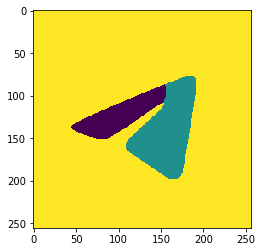

In [415]:
plt.imshow(img_2)

In [416]:
img = imread('output-onlinepngtools.png')
img = np.mean(img, axis=2)

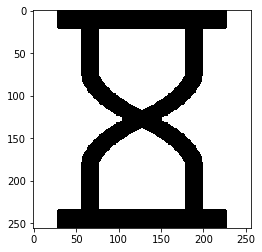

In [417]:
bimage = binar(img, 0.5) * (- 1) + 1
plt.imshow(bimage, cmap='gray')

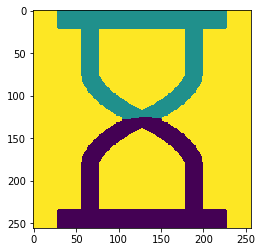

In [423]:
nodes, A = make_sparse_from_bin_image(bimage)
v_fidler, eigs, eps = partition(A, 0.0001, 10, 10, np.random.rand(A.shape[0]), 1e-5)
img_2 = np.copy(bimage)
for i, xy in enumerate(nodes):
    if v_fidler[i] > 0:
        img_2[xy[0], xy[1]] = 0.5
plt.imshow(img_2)

Спектральное разбиение такого графа - разрезание картинки на две связные части так, чтобы линия разреза была минимальной (т.к. мы стараемся разрезать по вершинам с минимальным количеством соседей)